In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from itertools import product
import matplotlib.pyplot as plt

# load dataset 5

In [2]:
df = pd.read_csv('5_interest_rate.csv', low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88058 entries, 0 to 88057
Data columns (total 34 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   census_tract                              88024 non-null  float64
 1   action_taken                              88058 non-null  int64  
 2   loan_type                                 88058 non-null  int64  
 3   lien_status                               88058 non-null  int64  
 4   reverse_mortgage                          88058 non-null  int64  
 5   open_end_line_of_credit                   88058 non-null  int64  
 6   loan_amount                               88058 non-null  int64  
 7   combined_loan_to_value_ratio              67034 non-null  object 
 8   interest_rate                             88058 non-null  object 
 9   total_loan_costs                          56823 non-null  object 
 10  origination_charges               

In [4]:
df.head()

,census_tract,action_taken,loan_type,lien_status,reverse_mortgage,open_end_line_of_credit,loan_amount,combined_loan_to_value_ratio,interest_rate,total_loan_costs,...,co_applicant_credit_score_type,applicant_sex,co_applicant_sex,applicant_age,co_applicant_age,aus_1,applicant_race_1,co_applicant_race_1,applicant_ethnicity_1,co_applicant_ethnicity_1
0,4.201710e+10,2,1,1,2,2,345000,79.254,3.0-3.5,NaN,...,1,1,2,2,3,1,NaN,NaN,2.0,2.0
1,3.403903e+10,5,2,1,2,2,225000,NaN,Other,NaN,...,9,1,2,2,2,1,5.0,5.0,1.0,1.0
2,4.209120e+10,1,1,1,2,2,355000,75.822,4.0-4.5,8352.71,...,3,1,2,1,7,1,5.0,5.0,2.0,2.0
3,3.200300e+10,5,1,1,2,2,85000,NaN,Other,NaN,...,9,1,2,7,7,1,5.0,5.0,2.0,2.0
4,5.513320e+10,1,2,1,2,2,285000,84.777,4.0-4.5,6854.68,...,9,1,2,1,1,6,5.0,5.0,2.0,2.0


In [5]:
print(df['combined_loan_to_value_ratio'].value_counts())

combined_loan_to_value_ratio
80.0      12563
97.0       3375
95.0       2672
75.0       2671
90.0       1996
          ...  
49.242        1
196.0         1
92.333        1
60.392        1
55.707        1
Name: count, Length: 20739, dtype: int64


In [6]:
unique_categories = df['combined_loan_to_value_ratio'].nunique()
print("Number of Unique Categories:", unique_categories)

Number of Unique Categories: 20739


In [7]:
# First, convert the 'interest_rate' column to numeric (float)
df['combined_loan_to_value_ratio'] = pd.to_numeric(df['combined_loan_to_value_ratio'], errors='coerce')

# Now, calculate the minimum, maximum, and median
minimum_interest_rate = df['combined_loan_to_value_ratio'].min()
maximum_interest_rate = df['combined_loan_to_value_ratio'].max()
median_interest_rate = df['combined_loan_to_value_ratio'].median()

print("Minimum Interest Rate:", minimum_interest_rate)
print("Maximum Interest Rate:", maximum_interest_rate)
print("Median Interest Rate:", median_interest_rate)

Minimum Interest Rate: 0.661
Maximum Interest Rate: 29742.857
Median Interest Rate: 78.8


In [11]:
import pandas as pd

# Assuming df is your DataFrame

# Convert the 'interest_rate' column to numeric (float)
df['combined_loan_to_value_ratio'] = pd.to_numeric(df['combined_loan_to_value_ratio'], errors='coerce')  # 'coerce' handles non-numeric values by converting them to NaN

# Calculate the quantiles
Q1 = df['combined_loan_to_value_ratio'].quantile(0.25)
Q3 = df['combined_loan_to_value_ratio'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['combined_loan_to_value_ratio'] < lower_bound) | (df['combined_loan_to_value_ratio'] > upper_bound)]


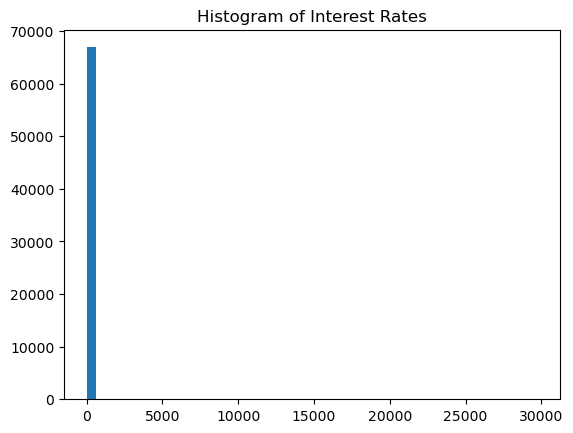

In [12]:
plt.hist(df['combined_loan_to_value_ratio'], bins=50)  # Adjust the number of bins as needed
plt.title('Histogram of combined_loan_to_value_ratio')
plt.show()

[79.254    nan 75.822 ... 44.163 85.901 55.707]
21133


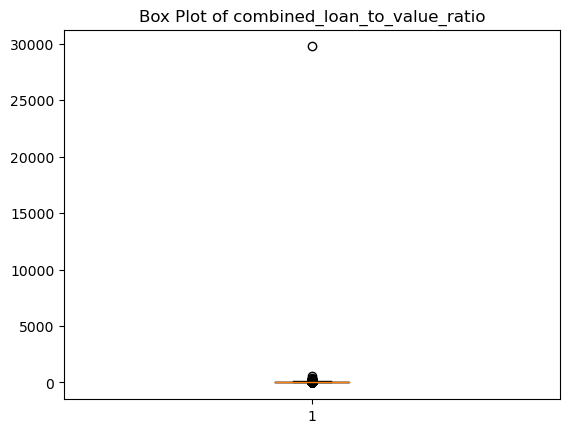

In [13]:
df1 = df.copy()
df1['combined_loan_to_value_ratio'] = pd.to_numeric(df['combined_loan_to_value_ratio'], errors='coerce')
df1 = df1.dropna(subset=['combined_loan_to_value_ratio'])

print(df['combined_loan_to_value_ratio'].unique())
print(df['combined_loan_to_value_ratio'].isna().sum())

# Create a box plot of the 'interest_rate' column
plt.boxplot(df1['combined_loan_to_value_ratio'])
plt.title('Box Plot of combined_loan_to_value_ratio')
plt.show()

## The outlier squashes the data.
We can draw a boxplot without the outlier.

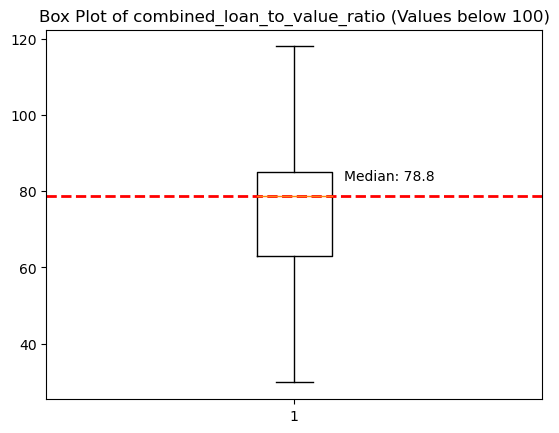

In [14]:
# Create a box plot of the 'combined_loan_to_value_ratio' column
plt.boxplot(df1['combined_loan_to_value_ratio'], showfliers=False)  # Exclude outliers
plt.title('Box Plot of combined_loan_to_value_ratio (Values below 100)')

# Calculate the median value
median_value = df1['combined_loan_to_value_ratio'].median()

# Add a median line
plt.axhline(median_value, color='r', linestyle='dashed', linewidth=2)

# Add text with the median value 5 pixels above the line
plt.text(1.1, median_value + 5, f'Median: {median_value}', va='center')

plt.show()

# Conclusion

A median combined loan-to-value (CLTV) ratio of 78.8 suggests that, in the dataset, the typical loan is issued with the borrower having equity in the property of approximately 78.8%. 
In the context of mortgages and lending, a CLTV ratio below 100% indicates that the borrower has some level of equity in the property.

In general, a lower CLTV ratio is often seen as less risky for lenders because it means the borrower has a larger stake in the property. 
A higher CLTV ratio, on the other hand, may indicate higher risk for the lender.

# Remove outliers

In [39]:
# Calculate the IQR for combined_loan_to_value_ratio
Q1 = df1['combined_loan_to_value_ratio'].quantile(0.25)
Q3 = df1['combined_loan_to_value_ratio'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a boolean mask for outliers
outliers_mask = (df1['combined_loan_to_value_ratio'] < lower_bound) | (df1['combined_loan_to_value_ratio'] > upper_bound)

# Create a new DataFrame without outliers
df_no_outliers = df1[~outliers_mask]

# Display the number of removed outliers
print(f'Number of removed outliers: {outliers_mask.sum()}')

Number of removed outliers: 1995


In [40]:
# Create a DataFrame of removed outliers
outliers_df = df1[outliers_mask]

# Display the values of the removed outliers
print(outliers_df['combined_loan_to_value_ratio'])

40        17.102
433       20.896
473       26.190
608       25.333
648      293.545
          ...   
87914     27.350
88012     17.338
88024     11.538
88046     25.000
88056     25.000
Name: combined_loan_to_value_ratio, Length: 1995, dtype: float64


In [41]:
print(df_no_outliers['combined_loan_to_value_ratio'].value_counts())

combined_loan_to_value_ratio
80.000    12563
97.000     3375
95.000     2672
75.000     2671
90.000     1996
          ...  
68.113        1
71.311        1
56.301        1
75.694        1
55.707        1
Name: count, Length: 19239, dtype: int64


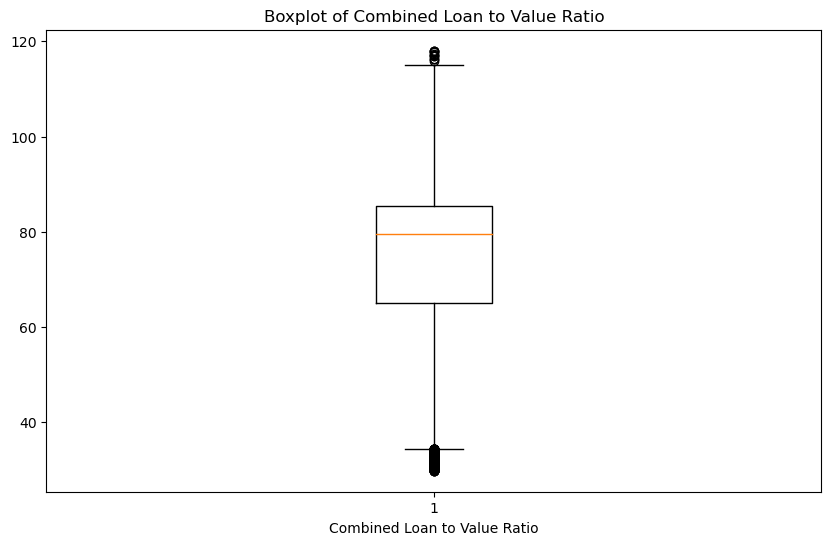

In [42]:
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame
plt.figure(figsize=(10, 6))
plt.boxplot(df_no_outliers['combined_loan_to_value_ratio'])
plt.title('Boxplot of Combined Loan to Value Ratio')
plt.xlabel('Combined Loan to Value Ratio')
plt.show()

In [43]:
print(df_no_outliers['combined_loan_to_value_ratio'].value_counts())

combined_loan_to_value_ratio
80.000    12563
97.000     3375
95.000     2672
75.000     2671
90.000     1996
          ...  
68.113        1
71.311        1
56.301        1
75.694        1
55.707        1
Name: count, Length: 19239, dtype: int64


In [46]:
# First, convert the 'combined_loan_to_value_ratio' column to numeric (float)
df_no_outliers.loc[:, 'combined_loan_to_value_ratio'] = pd.to_numeric(df_no_outliers['combined_loan_to_value_ratio'], errors='coerce')

# Now, calculate the minimum, maximum, and median
minimum_interest_rate = df_no_outliers['combined_loan_to_value_ratio'].min()
maximum_interest_rate = df_no_outliers['combined_loan_to_value_ratio'].max()
median_interest_rate = df_no_outliers['combined_loan_to_value_ratio'].median()

print("Minimum Interest Rate:", minimum_interest_rate)
print("Maximum Interest Rate:", maximum_interest_rate)
print("Median Interest Rate:", median_interest_rate)

Minimum Interest Rate: 29.764
Maximum Interest Rate: 118.026
Median Interest Rate: 79.461
